# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())

version: 0.1.38+40.geb12c43.dirty
is notebook? True


In [2]:
data_dir = "../data/fomc"

## Load a feature set

In [3]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_fomc = eKonf.instantiate(fs_cfg)

INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env
INFO:ekorpkit.base:setting environment variable CACHED_PATH_CACHE_ROOT to /workspace/.cache/cached_path
INFO:ekorpkit.base:setting environment variable KMP_DUPLICATE_LIB_OK to TRUE


## Auto ML

In [12]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 60
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:No method defined to call


In [5]:
model.fit()

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 10, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}
Best accuracy on validation data: 0.672
Training duration of best run: 0.03197 s


In [6]:
model.best_estimator

LGBMClassifier(colsample_bytree=0.9086551727646448,
               learning_rate=0.2293009676418639, max_bin=511,
               min_child_samples=18, n_estimators=10, num_leaves=4,
               reg_alpha=0.0015561782752413472, reg_lambda=0.33127416269768944,
               verbose=-1)

In [7]:
model.save()

In [13]:
model.load()

In [14]:
model.show_results()

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 10, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}
Best accuracy on validation data: 0.672
Training duration of best run: 0.03197 s


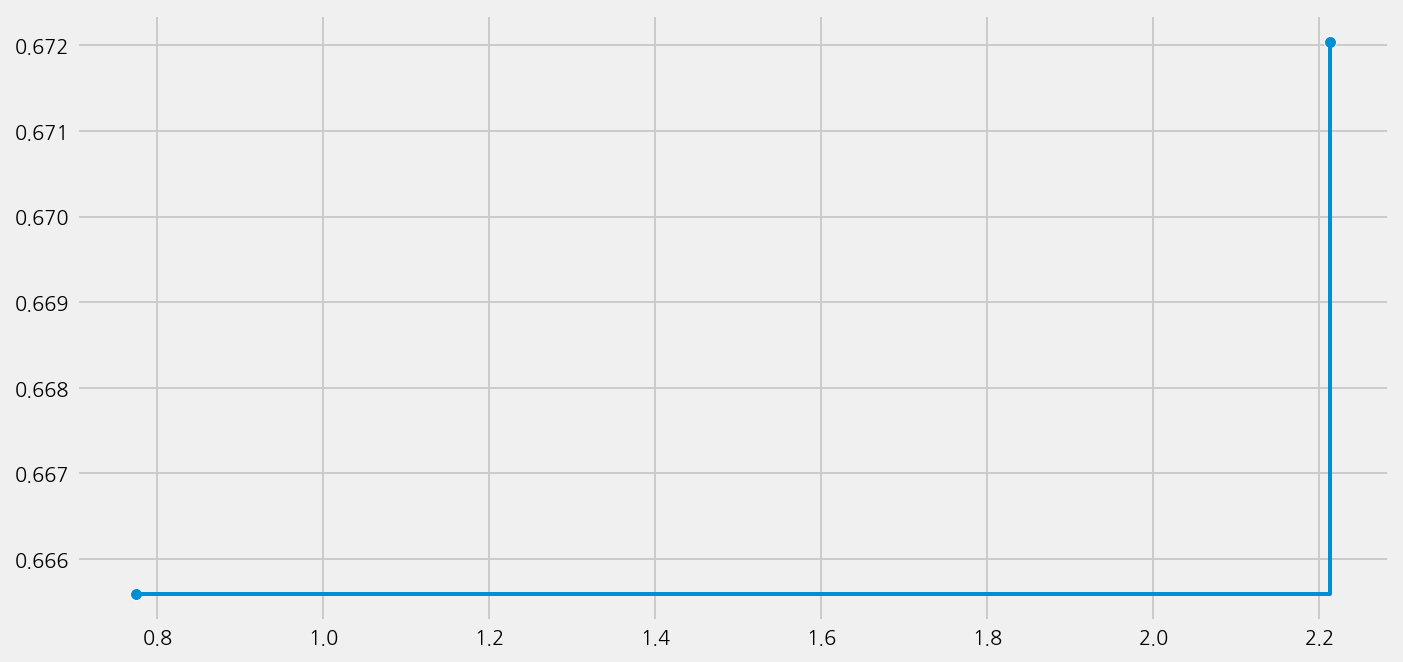

In [15]:
model.plot_learning_curve()

r2: -0.3066542577943232
mse: 0.7788461538461539
mae: 0.47115384615384615
Accuracy:  0.6826923076923077
Precison:  0.6514423076923077
Recall:  0.6826923076923077
F1 Score:  0.6251761059453366
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.62      0.28      0.38        18
        Hike       0.50      0.12      0.19        17
        Hold       0.70      0.93      0.80        69

    accuracy                           0.68       104
   macro avg       0.61      0.44      0.46       104
weighted avg       0.65      0.68      0.63       104



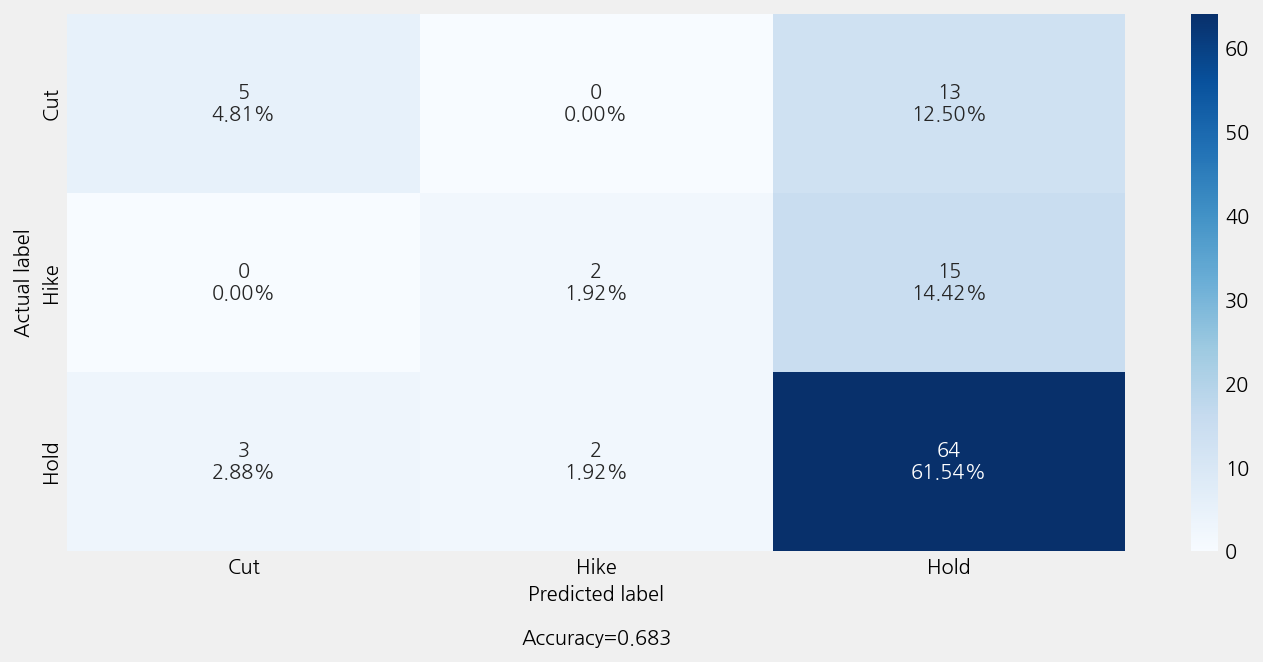

In [16]:
model.eval()

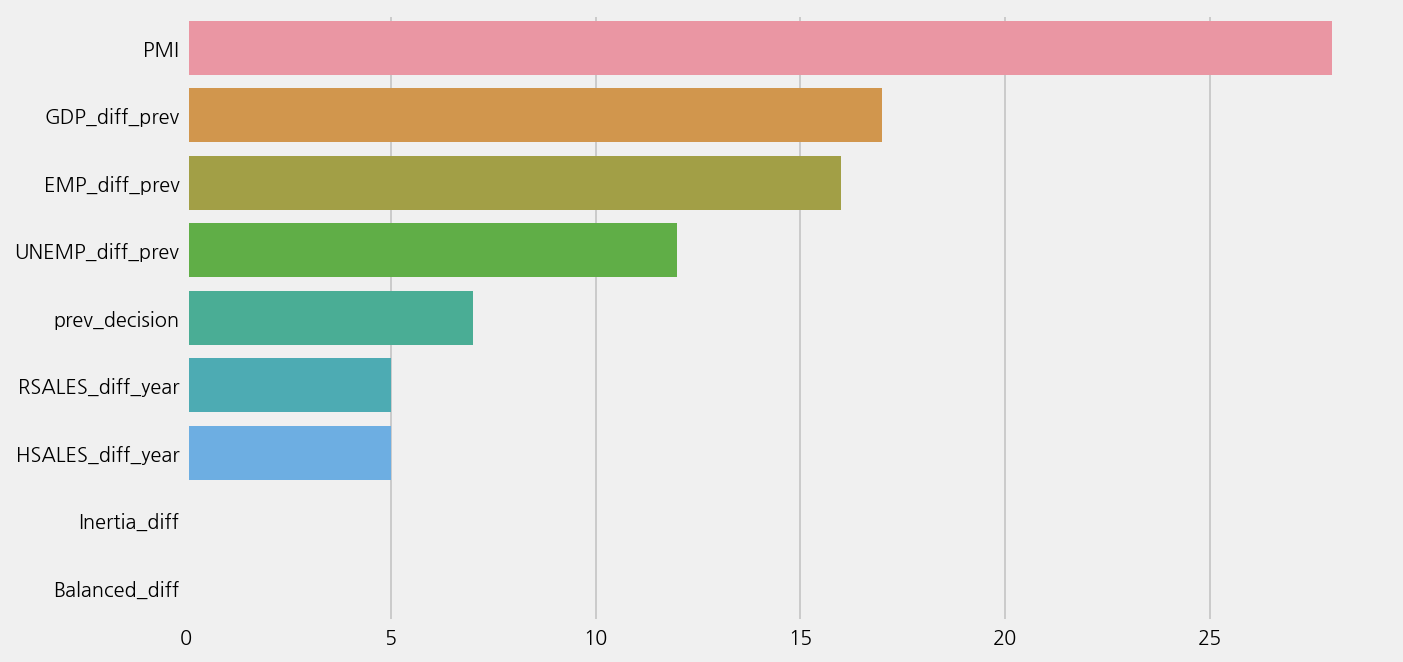

In [17]:
model.plot_feature_importance()

In [18]:
model.get_feature_importance()

,columns,importances
2,PMI,28
1,GDP_diff_prev,17
3,EMP_diff_prev,16
5,UNEMP_diff_prev,12
0,prev_decision,7
4,RSALES_diff_year,5
6,HSALES_diff_year,5
7,Inertia_diff,0
8,Balanced_diff,0
